In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn prophet


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from prophet import Prophet

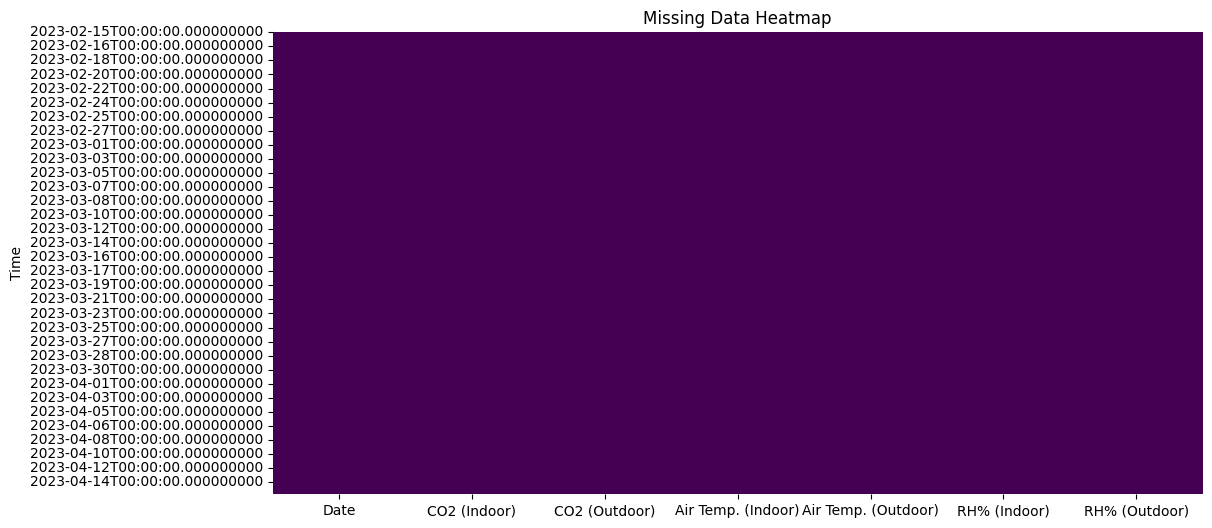

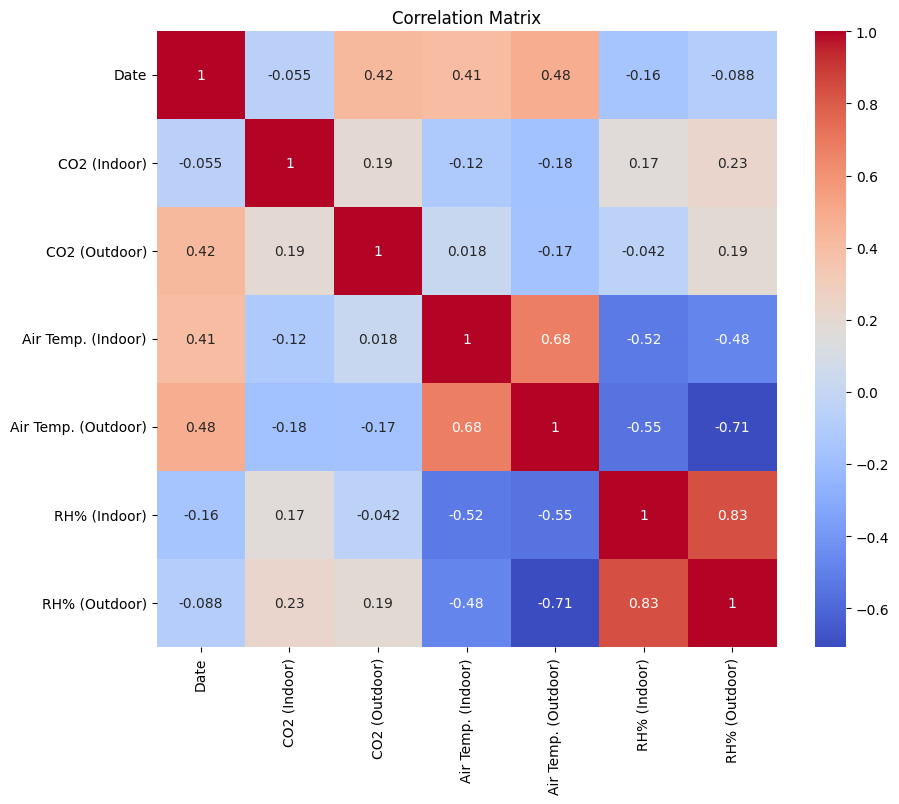

In [10]:


# Load your dataset
df = pd.read_excel('DataBedroom + a6 (1).xlsx')

# Step 1: Data Cleansing
# Replace zeros with NaN and fill missing values with column means
df.replace(0, np.nan, inplace=True)

numeric_df = df.select_dtypes(include=[np.number])
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())

# Step 2: Feature Engineering
df['Time'] = pd.to_datetime(df['Date'])
df.set_index('Time', inplace=True)

# Visualizing Missing Data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Step 3: Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
df = pd.read_excel(r"/content/modified_it_is.xlsx")

In [ ]:
df.head()

,Timestamp,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,total energy,CO2,Indoor Temperature,Atmospheric Pressure,Relative Humidity,...,CO2.1,Outdoor Temperature,Atmospheric Pressure.1,Relative Humidity.1,Dew Point Temperature.1,Concentration ( g/m3).1,Day of week,Time Class,Normalized Energy,Energy Class
0,2023-02-14 00:00:00,0.0,0.0,0.0,0.0,0.0,396.0,25.8,1008.0,44.0,...,401.0,22.0,1008.0,48.7,10.7,9.4,3.0,9.0,0.0432,1.0
1,2023-02-14 00:15:00,0.0,0.0,0.0,0.0,0.0,400.0,25.8,1008.0,44.0,...,399.0,21.8,1008.0,48.1,10.4,9.2,3.0,9.0,0.0432,1.0
2,2023-02-14 00:30:00,0.0,0.0,0.0,0.0,0.0,398.0,25.8,1008.0,43.8,...,391.0,21.7,1008.0,46.4,9.7,8.9,3.0,9.0,0.0432,1.0
3,2023-02-14 00:45:00,0.0,0.0,0.0,0.0,0.0,393.0,25.8,1008.0,43.5,...,391.0,21.6,1008.0,45.8,9.5,8.7,3.0,9.0,0.0432,1.0
4,2023-02-14 01:00:00,0.0,0.0,0.0,0.0,0.0,388.0,25.7,1008.0,43.4,...,389.0,21.5,1008.0,45.2,9.2,8.5,3.0,9.0,0.0432,1.0


Text(0.5, 1.0, 'Energy Consumption over Time')

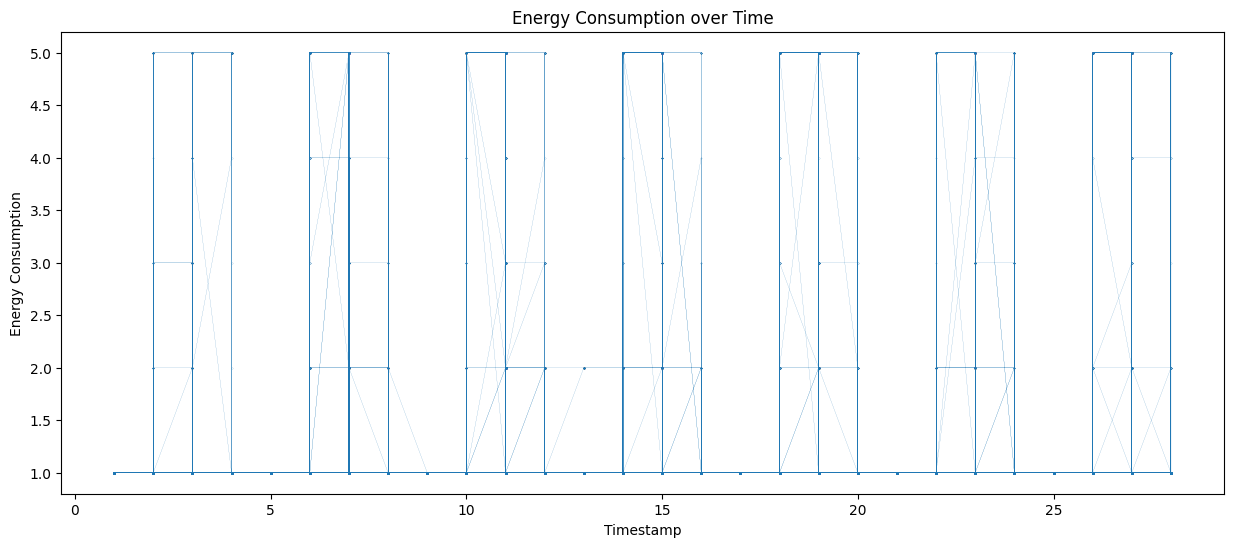

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['Time Class'], df['Energy Class'], marker='o', linestyle='-', linewidth=0.1, markersize=0.1)
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption over Time')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaunt6cpg/iq0bdzz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaunt6cpg/ua_g71kc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99984', 'data', 'file=/tmp/tmpaunt6cpg/iq0bdzz7.json', 'init=/tmp/tmpaunt6cpg/ua_g71kc.json', 'output', 'file=/tmp/tmpaunt6cpg/prophet_modellpphrhpk/prophet_model-20240505195500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:01 - cmdstanpy - INFO - Chain

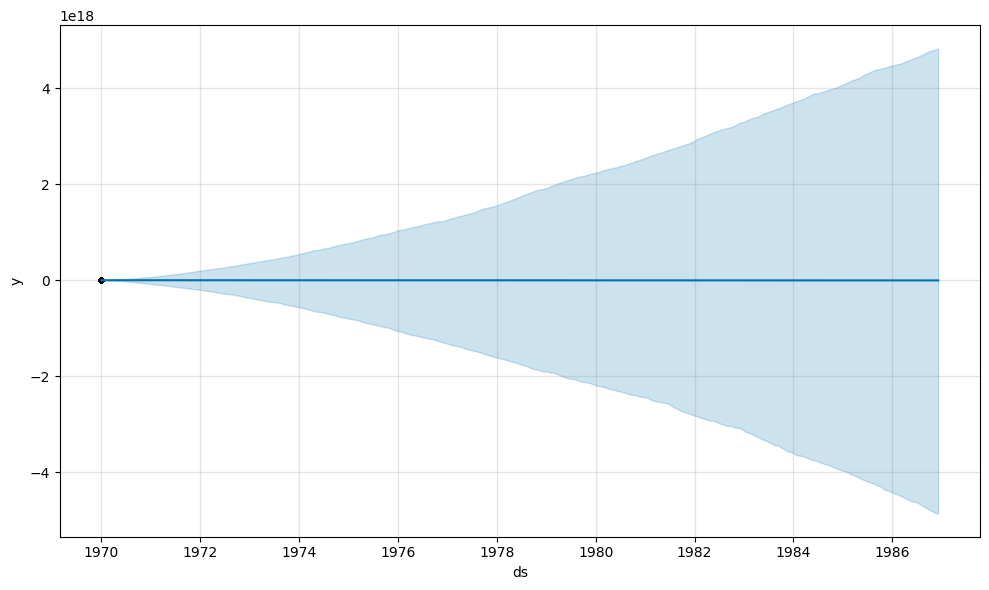

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'pjme' is your DataFrame containing the data
# Assuming 'Time Class' and 'Energy Class' are your columns of interest

# Prepare your DataFrame with 'ds' and 'y' columns required by Prophet
# Assuming 'Time Class' is your time column and 'Energy Class' is your target variable
df.rename(columns={'Time Class': 'ds', 'Energy Class': 'y'}, inplace=True)
# Drop rows with NaN values
df.dropna(subset=['ds'], inplace=True)

# Split the data into features (X) and target variable (y)
X = df[['ds']]  # Assuming 'Time Class' is your time column
y = df[['y']]   # Assuming 'Energy Class' is your target variable

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Combine the training features and target variable into training DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Create a Prophet model instance
model = prophet.Prophet()



# Fit the model to the training data
model.fit(train_df)

# Make predictions on the testing data
future = model.make_future_dataframe(periods=len(X_test))
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
